In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

import warnings
warnings.filterwarnings('ignore')

# Exploring

In [2]:
df_dvf = pd.read_csv('../raw_data/dvf_93.csv')

df_dvf.shape

(271360, 41)

In [3]:
df_dvf['code_departement']

0         93
1         93
2         93
3         93
4         93
          ..
271355    93
271356    93
271357    93
271358    93
271359    93
Name: code_departement, Length: 271360, dtype: object

In [4]:
df_dvf.duplicated().sum()

77094

In [5]:
df_dvf['nature_mutation'].unique()

array(["Vente en l'état futur d'achèvement", 'Vente', 'Expropriation',
       'Echange', 'Vente terrain à bâtir', 'Adjudication',
       'nature_mutation'], dtype=object)

In [6]:
df_dvf['nature_mutation'].value_counts()

nature_mutation
Vente                                 188594
Vente en l'état futur d'achèvement     78211
Adjudication                            2066
Expropriation                           1556
Echange                                  739
Vente terrain à bâtir                    189
nature_mutation                            5
Name: count, dtype: int64

In [7]:
df_dvf.dtypes

id_mutation                     object
date_mutation                   object
numero_disposition              object
nature_mutation                 object
valeur_fonciere                 object
adresse_numero                  object
adresse_suffixe                 object
adresse_nom_voie                object
adresse_code_voie               object
code_postal                     object
code_commune                    object
nom_commune                     object
code_departement                object
ancien_code_commune             object
ancien_nom_commune              object
id_parcelle                     object
ancien_id_parcelle              object
numero_volume                   object
lot1_numero                     object
lot1_surface_carrez             object
lot2_numero                     object
lot2_surface_carrez             object
lot3_numero                     object
lot3_surface_carrez             object
lot4_numero                     object
lot4_surface_carrez      

In [8]:
df_dvf.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude',
       'section_prefixe'],
      dtype='object')

In [9]:
df_dvf.isnull().sum()

id_mutation                          0
date_mutation                        0
numero_disposition                   0
nature_mutation                      0
valeur_fonciere                   2591
adresse_numero                   29402
adresse_suffixe                 259219
adresse_nom_voie                 10195
adresse_code_voie                10195
code_postal                      10195
code_commune                         0
nom_commune                          0
code_departement                     0
ancien_code_commune             270288
ancien_nom_commune              270288
id_parcelle                          0
ancien_id_parcelle              271355
numero_volume                   269411
lot1_numero                      68751
lot1_surface_carrez             226795
lot2_numero                     224988
lot2_surface_carrez             259418
lot3_numero                     265455
lot3_surface_carrez             270341
lot4_numero                     269360
lot4_surface_carrez      

In [10]:
df_dvf[['code_postal', 'code_commune', 'nom_commune']].isnull().sum()/len(df_dvf)

code_postal     0.03757
code_commune    0.00000
nom_commune     0.00000
dtype: float64

In [11]:
df_dvf['nombre_lots'].astype('str').value_counts()

nombre_lots
1              156237
0               68751
2               40467
3                3905
4                1109
5                 432
6                 185
7                 114
9                  40
8                  38
10                 18
12                  8
11                  6
13                  6
15                  5
nombre_lots         5
28                  4
27                  4
20                  3
19                  3
45                  3
16                  2
34                  2
31                  2
22                  2
14                  2
198                 1
120                 1
95                  1
18                  1
21                  1
61                  1
17                  1
Name: count, dtype: int64

In [12]:
df_dvf['type_local'].unique()

array([nan, 'Appartement', 'Dépendance',
       'Local industriel. commercial ou assimilé', 'Maison', 'type_local'],
      dtype=object)

# 🔅 Preprocessings

## 🧹 Keep only useful columns and translate

### Removing columns

In [13]:
keep_col =['date_mutation',
            'nature_mutation',
            'valeur_fonciere',
            'code_postal',
            'code_commune',
            'code_departement',
            'nombre_lots',
            'type_local',
            'surface_reelle_bati',
            'nombre_pieces_principales',
            'longitude',
            'latitude']
df_dvf = df_dvf[keep_col]

df_dvf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   date_mutation              271360 non-null  object
 1   nature_mutation            271360 non-null  object
 2   valeur_fonciere            268769 non-null  object
 3   code_postal                261165 non-null  object
 4   code_commune               271360 non-null  object
 5   code_departement           271360 non-null  object
 6   nombre_lots                271360 non-null  object
 7   type_local                 208331 non-null  object
 8   surface_reelle_bati        121084 non-null  object
 9   nombre_pieces_principales  208146 non-null  object
 10  longitude                  267372 non-null  object
 11  latitude                   267372 non-null  object
dtypes: object(12)
memory usage: 24.8+ MB


### Translate column-names

In [14]:
df_dvf.columns = ['date', 'built', 'price', 'postal_code',
                'city', 'region', 'number_of_units', 'property_type',
                'living_area', 'number_of_rooms',
                'longitude', 'latitude']

### Remove non-representative rows

In [15]:
df_dvf.shape

(271360, 12)

In [16]:
df_dvf['built'].unique()

array(["Vente en l'état futur d'achèvement", 'Vente', 'Expropriation',
       'Echange', 'Vente terrain à bâtir', 'Adjudication',
       'nature_mutation'], dtype=object)

We want to keep only :
- Houses and appartments
- Normal sales and off-plan sales
- Sales with only one unit

In [17]:
print('Shape before the masks : ', df_dvf.shape)
print('Shape only normal sales', df_dvf[((df_dvf['built'] == "Vente") | (df_dvf['built'] == "Vente en l'état futur d'achèvement"))].shape)
print('Shape only 1 unit', df_dvf[((df_dvf['number_of_units'] == 1) | (df_dvf['number_of_units'] == '1'))].shape)
print('Shape only house and appartments', df_dvf[((df_dvf['property_type'] == 'Appartement') | (df_dvf['property_type'] == 'Maison'))].shape)

Shape before the masks :  (271360, 12)
Shape only normal sales (266805, 12)
Shape only 1 unit (156237, 12)
Shape only house and appartments (110400, 12)


In [18]:
df_useful = df_dvf[((df_dvf['built'] == "Vente") | (df_dvf['built'] == "Vente en l'état futur d'achèvement")) &
                    ((df_dvf['number_of_units'] == 1) | (df_dvf['number_of_units'] == '1')) &
                    ((df_dvf['property_type'] == 'Appartement') | (df_dvf['property_type'] == 'Maison'))]
df_useful.shape

(42354, 12)

In [19]:
## checking that the masks worked correctly
print(df_useful['built'].unique())
print(df_useful['number_of_units'].unique())
print(df_useful['property_type'].unique())


['Vente' "Vente en l'état futur d'achèvement"]
[1 '1']
['Appartement' 'Maison']


### Translating the values

In [20]:
trans_dict_built = {'Vente' : 'built',
                    'Vente en l’état futur d’achèvement' : 'off-plan'}
trans_dict_type = {'Appartement' : 'appartment',
                   'Maison' : 'house'}
df_useful= df_useful.replace({'built' : trans_dict_built,
                             'property type' : trans_dict_type})

In [21]:
# checking we didn't lose rows
df_useful.shape

(42354, 12)

## Dropping duplicates and NaNs

In [22]:
df_useful.columns

Index(['date', 'built', 'price', 'postal_code', 'city', 'region',
       'number_of_units', 'property_type', 'living_area', 'number_of_rooms',
       'longitude', 'latitude'],
      dtype='object')

In [23]:
## dropping the column with number of units (only 1s)
df_useful = df_useful.drop(columns='number_of_units')

In [24]:
df_useful.columns

Index(['date', 'built', 'price', 'postal_code', 'city', 'region',
       'property_type', 'living_area', 'number_of_rooms', 'longitude',
       'latitude'],
      dtype='object')

In [25]:
## checking for NaN values
df_useful.isna().sum()
df_useful = df_useful.dropna()
df_useful.shape
df_useful = df_useful.drop_duplicates()
df_useful.shape

(30655, 11)

## Changing everything to the right type

In [26]:
col_float = ['price', 'longitude', 'latitude', 'postal_code', 'living_area', 'number_of_rooms']
col_string = ['built','city', 'region','property_type']
col_date = ['date']
### Formating data types ####
df_useful[col_float] = df_useful[col_float].apply(lambda x: pd.to_numeric(x, errors='coerce').astype('float64'))
df_useful[col_date]= df_useful[col_date].apply(lambda x: pd.to_datetime(x, errors='coerce'))

df_useful.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30655 entries, 61 to 262139
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             30655 non-null  datetime64[ns]
 1   built            30655 non-null  object        
 2   price            30655 non-null  float64       
 3   postal_code      30655 non-null  float64       
 4   city             30655 non-null  object        
 5   region           30655 non-null  object        
 6   property_type    30655 non-null  object        
 7   living_area      30655 non-null  float64       
 8   number_of_rooms  30655 non-null  float64       
 9   longitude        30655 non-null  float64       
 10  latitude         30655 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 2.8+ MB


In [27]:
df_useful.shape

(30655, 11)

In [28]:
df_useful.head()

,date,built,price,postal_code,city,region,property_type,living_area,number_of_rooms,longitude,latitude
61,2021-01-04,built,483400.0,93170.0,93006,93,Appartement,74.0,3.0,2.423187,48.858609
62,2021-01-07,built,170000.0,93130.0,93053,93,Appartement,42.0,2.0,2.465074,48.887137
65,2021-01-06,built,55000.0,93700.0,93029,93,Appartement,26.0,1.0,2.455386,48.914226
83,2021-01-11,built,252000.0,93230.0,93063,93,Appartement,50.0,2.0,2.440520,48.882042
85,2021-01-11,built,151190.0,93700.0,93029,93,Appartement,53.0,2.0,2.463303,48.913323


### Visualization of the department

<Axes: xlabel='longitude', ylabel='latitude'>

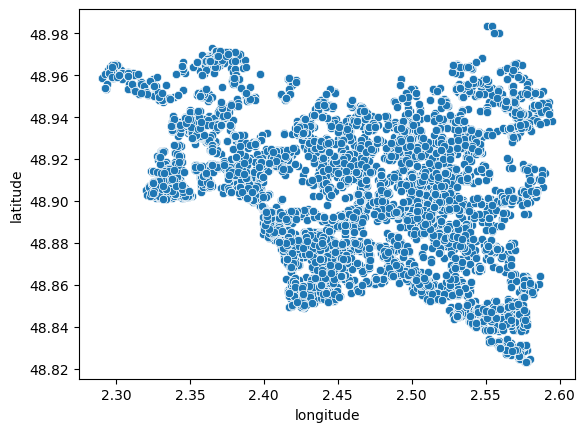

In [29]:
# import folium
# m = folium.Map(location = [-33.8, 151.2], tiles ='OpenStreetMap', zoom_start=11)
import seaborn as sns
sns.scatterplot(x = df_useful['longitude'], y = df_useful['latitude'])

# 🤓 Feature engineering

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Drop duplicates

In [31]:
df_useful = df_useful.drop_duplicates()

In [32]:
df_useful.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30655 entries, 61 to 262139
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             30655 non-null  datetime64[ns]
 1   built            30655 non-null  object        
 2   price            30655 non-null  float64       
 3   postal_code      30655 non-null  float64       
 4   city             30655 non-null  object        
 5   region           30655 non-null  object        
 6   property_type    30655 non-null  object        
 7   living_area      30655 non-null  float64       
 8   number_of_rooms  30655 non-null  float64       
 9   longitude        30655 non-null  float64       
 10  latitude         30655 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 2.8+ MB


### Drop Region

In [33]:
#Region information is contained in postal code
df_useful = df_useful.drop(columns='region')

### Living area data has to be preprocessed because living area < 9qm does not make sense

This has to go into the preprocessing steps

In [34]:
'''To legally rent an apartment in France, it must have a minimum ceiling height of 2.2m,
a minimum area of 9m² with a window, a separate bathroom, heating, a water system, and working
drains and gutters. In addition, the building and the apartment must not threaten a tenant's health and safety.'''

#Drop everything below 9qm
df_useful = df_useful[df_useful['living_area'] >= 9]

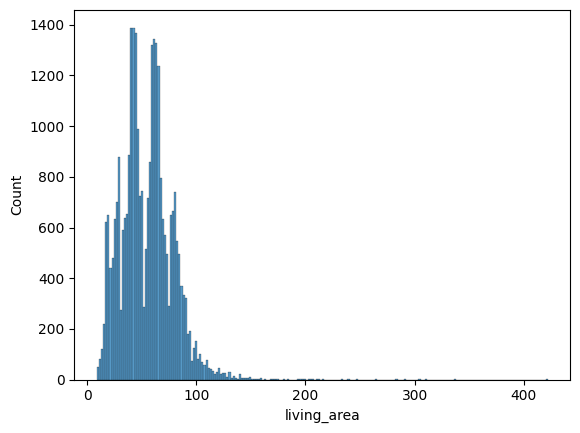

In [35]:
#Check for outliers
sns.histplot(x='living_area', data=df_useful)
plt.show()

In [36]:
df_useful.sort_values(by='living_area', ascending=True).head()

,date,built,price,postal_code,city,property_type,living_area,number_of_rooms,longitude,latitude
145891,2019-02-28,built,140000.0,93400.0,93070,Appartement,9.0,1.0,2.329897,48.902324
144796,2019-02-01,built,38000.0,93210.0,93066,Appartement,9.0,1.0,2.361568,48.907253
17220,2021-11-26,built,164020.0,93300.0,93001,Appartement,9.0,1.0,2.381434,48.913828
34196,2021-05-12,built,15000.0,93600.0,93005,Appartement,9.0,1.0,2.494689,48.931105
245801,2021-05-12,built,15000.0,93600.0,93005,Appartement,9.0,1.0,2.494689,48.931105


In [37]:
df_useful.shape

(30624, 10)

### All columns

In [38]:
df_useful.columns

Index(['date', 'built', 'price', 'postal_code', 'city', 'property_type',
       'living_area', 'number_of_rooms', 'longitude', 'latitude'],
      dtype='object')

In [39]:
df_useful.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30624 entries, 61 to 262139
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             30624 non-null  datetime64[ns]
 1   built            30624 non-null  object        
 2   price            30624 non-null  float64       
 3   postal_code      30624 non-null  float64       
 4   city             30624 non-null  object        
 5   property_type    30624 non-null  object        
 6   living_area      30624 non-null  float64       
 7   number_of_rooms  30624 non-null  float64       
 8   longitude        30624 non-null  float64       
 9   latitude         30624 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 2.6+ MB


### 'Date' to datetime and 'Year'

In [40]:
#Change to datetime and create a 'year' column

df_useful['date'] = pd.to_datetime(df_useful['date'])
df_useful['year'] = df_useful['date'].dt.year
df_useful['year'].unique()

array([2021, 2018, 2022, 2019, 2020], dtype=int32)

### 'Built' - Encoding

In [41]:
#Needs to be encoded in numbers
df_useful['built'] = df_useful['built'].map({'built': 1, 'Vente en l\'état futur d\'achèvement': 0})
df_useful['built'].unique()

array([1, 0])

### 'Price' Viz

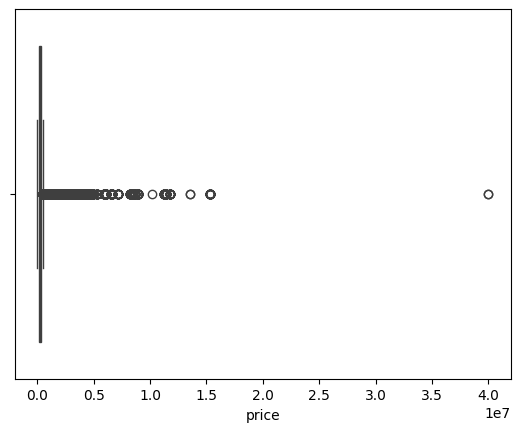

In [42]:
#Check for outliers, 'price' column remains unchanged
sns.boxplot(x='price', data=df_useful)
plt.show()

### Postal Code, City and Region + Property Type

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder

In [44]:
#Postal Code
print(df_useful['postal_code'].value_counts())
df_useful['postal_code'] = df_useful['postal_code'].astype(int) #changed from floats to integers

postal_code
93160.0    3292
93100.0    2411
93400.0    1859
93200.0    1503
93300.0    1341
93420.0    1193
93500.0    1118
93330.0    1106
93110.0    1076
93220.0    1031
93190.0    1012
93150.0     987
93000.0     844
93130.0     840
93230.0     809
93700.0     714
93600.0     683
93270.0     653
93800.0     636
93140.0     597
93170.0     570
93250.0     527
93210.0     515
93370.0     501
93360.0     490
93120.0     463
93290.0     420
93320.0     408
93380.0     397
93340.0     335
93260.0     321
93350.0     290
93240.0     277
93460.0     273
93310.0     272
93410.0     209
93440.0     204
93450.0     152
93390.0     142
93470.0      82
93430.0      71
Name: count, dtype: int64


In [45]:
#City
print(df_useful['city'].value_counts()) #all good
df_useful['city'] = df_useful['city'].astype(int)

city
93051    1986
93048    1542
93051    1306
93066    1043
93066     975
         ... 
93014      56
93015      55
93079      40
93079      31
93015      27
Name: count, Length: 80, dtype: int64


In [46]:
#Property type
df_useful['property_type'].unique()
df_useful['property_type'] = df_useful['property_type'].astype(str)

In [47]:
column_transformer = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse_output=False, dtype=int), ['postal_code', 'property_type']),
        ('tar', TargetEncoder(), ['city']) #targetencode to keep the number of columns low
    ],
    remainder='passthrough'  # keep non-transformed columns
)

In [48]:
y = df_useful['price']
X = df_useful

In [49]:
df_useful.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30624 entries, 61 to 262139
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             30624 non-null  datetime64[ns]
 1   built            30624 non-null  int64         
 2   price            30624 non-null  float64       
 3   postal_code      30624 non-null  int64         
 4   city             30624 non-null  int64         
 5   property_type    30624 non-null  object        
 6   living_area      30624 non-null  float64       
 7   number_of_rooms  30624 non-null  float64       
 8   longitude        30624 non-null  float64       
 9   latitude         30624 non-null  float64       
 10  year             30624 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(3), object(1)
memory usage: 2.7+ MB


In [50]:
df_encoded = pd.DataFrame(column_transformer.fit_transform(X, y), columns=column_transformer.get_feature_names_out())
df_encoded.columns = df_encoded.columns.str.replace('remainder__', '')

In [51]:
df_encoded.head()

,ohe__postal_code_93000,ohe__postal_code_93100,ohe__postal_code_93110,ohe__postal_code_93120,ohe__postal_code_93130,ohe__postal_code_93140,ohe__postal_code_93150,ohe__postal_code_93160,ohe__postal_code_93170,ohe__postal_code_93190,...,ohe__property_type_Maison,tar__city,date,built,price,living_area,number_of_rooms,longitude,latitude,year
0,0,0,0,0,0,0,0,0,1,0,...,0,324330.150761,2021-01-04,1,483400.0,74.0,3.0,2.423187,48.858609,2021
1,0,0,0,0,1,0,0,0,0,0,...,0,337644.229377,2021-01-07,1,170000.0,42.0,2.0,2.465074,48.887137,2021
2,0,0,0,0,0,0,0,0,0,0,...,0,256913.694693,2021-01-06,1,55000.0,26.0,1.0,2.455386,48.914226,2021
3,0,0,0,0,0,0,0,0,0,0,...,0,328344.108852,2021-01-11,1,252000.0,50.0,2.0,2.44052,48.882042,2021
4,0,0,0,0,0,0,0,0,0,0,...,0,237236.544863,2021-01-11,1,151190.0,53.0,2.0,2.463303,48.913323,2021


### Living Area

In [52]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
df_encoded['living_area_scaled'] = mm_scaler.fit_transform(df_useful[['living_area']])

<Axes: xlabel='living_area_scaled', ylabel='Count'>

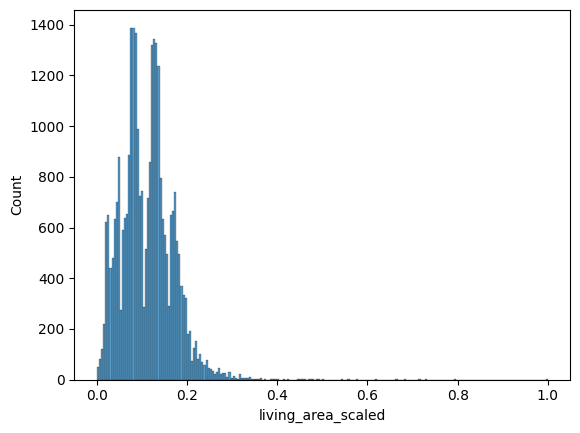

In [53]:
df_encoded.head()
sns.histplot(x='living_area_scaled', data=df_encoded)

In [54]:
# Drop cells
df_encoded = df_encoded.drop(columns='living_area')
df_encoded

,ohe__postal_code_93000,ohe__postal_code_93100,ohe__postal_code_93110,ohe__postal_code_93120,ohe__postal_code_93130,ohe__postal_code_93140,ohe__postal_code_93150,ohe__postal_code_93160,ohe__postal_code_93170,ohe__postal_code_93190,...,ohe__property_type_Maison,tar__city,date,built,price,number_of_rooms,longitude,latitude,year,living_area_scaled
0,0,0,0,0,0,0,0,0,1,0,...,0,324330.150761,2021-01-04,1,483400.0,3.0,2.423187,48.858609,2021,0.157385
1,0,0,0,0,1,0,0,0,0,0,...,0,337644.229377,2021-01-07,1,170000.0,2.0,2.465074,48.887137,2021,0.079903
2,0,0,0,0,0,0,0,0,0,0,...,0,256913.694693,2021-01-06,1,55000.0,1.0,2.455386,48.914226,2021,0.041162
3,0,0,0,0,0,0,0,0,0,0,...,0,328344.108852,2021-01-11,1,252000.0,2.0,2.44052,48.882042,2021,0.099274
4,0,0,0,0,0,0,0,0,0,0,...,0,237236.544863,2021-01-11,1,151190.0,2.0,2.463303,48.913323,2021,0.106538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30619,0,0,0,0,0,0,0,0,0,0,...,0,446217.08363,2021-05-07,0,370000.0,3.0,2.344616,48.90748,2021,0.140436
30620,0,0,0,0,0,0,0,0,0,0,...,0,361586.943956,2021-05-11,1,257500.0,2.0,2.347329,48.937029,2021,0.171913
30621,0,0,0,0,0,0,0,0,0,0,...,0,175536.89171,2021-05-07,1,223000.0,4.0,2.379998,48.958582,2021,0.171913
30622,0,0,0,0,0,0,0,0,0,0,...,0,349586.117972,2021-04-29,1,405000.0,4.0,2.348916,48.939137,2021,0.186441


### Number of rooms

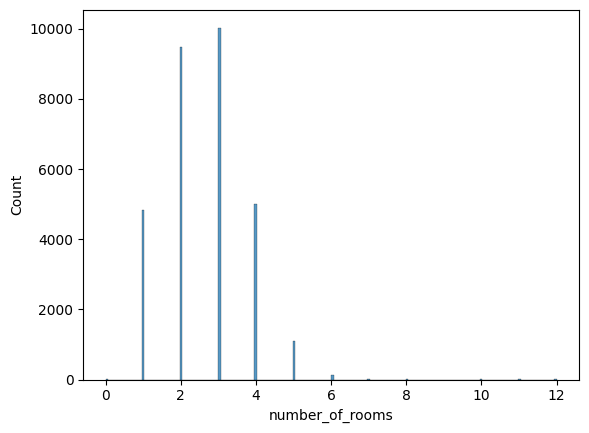

In [55]:
sns.histplot(x='number_of_rooms', data=df_encoded);
plt.show()

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded['number_of_rooms_scaled'] = scaler.fit_transform(df_encoded[['number_of_rooms']])

In [57]:
# Drop cells
df_encoded = df_encoded.drop(columns='number_of_rooms')
df_encoded

,ohe__postal_code_93000,ohe__postal_code_93100,ohe__postal_code_93110,ohe__postal_code_93120,ohe__postal_code_93130,ohe__postal_code_93140,ohe__postal_code_93150,ohe__postal_code_93160,ohe__postal_code_93170,ohe__postal_code_93190,...,ohe__property_type_Maison,tar__city,date,built,price,longitude,latitude,year,living_area_scaled,number_of_rooms_scaled
0,0,0,0,0,0,0,0,0,1,0,...,0,324330.150761,2021-01-04,1,483400.0,2.423187,48.858609,2021,0.157385,0.250000
1,0,0,0,0,1,0,0,0,0,0,...,0,337644.229377,2021-01-07,1,170000.0,2.465074,48.887137,2021,0.079903,0.166667
2,0,0,0,0,0,0,0,0,0,0,...,0,256913.694693,2021-01-06,1,55000.0,2.455386,48.914226,2021,0.041162,0.083333
3,0,0,0,0,0,0,0,0,0,0,...,0,328344.108852,2021-01-11,1,252000.0,2.44052,48.882042,2021,0.099274,0.166667
4,0,0,0,0,0,0,0,0,0,0,...,0,237236.544863,2021-01-11,1,151190.0,2.463303,48.913323,2021,0.106538,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30619,0,0,0,0,0,0,0,0,0,0,...,0,446217.08363,2021-05-07,0,370000.0,2.344616,48.90748,2021,0.140436,0.250000
30620,0,0,0,0,0,0,0,0,0,0,...,0,361586.943956,2021-05-11,1,257500.0,2.347329,48.937029,2021,0.171913,0.166667
30621,0,0,0,0,0,0,0,0,0,0,...,0,175536.89171,2021-05-07,1,223000.0,2.379998,48.958582,2021,0.171913,0.333333
30622,0,0,0,0,0,0,0,0,0,0,...,0,349586.117972,2021-04-29,1,405000.0,2.348916,48.939137,2021,0.186441,0.333333


In [58]:
df_encoded['longitude_scaled'] = mm_scaler.fit_transform(df_encoded[['longitude']])
df_encoded['latitude_scaled'] = mm_scaler.fit_transform(df_encoded[['latitude']])

In [59]:
df_encoded.drop(columns=['longitude', 'latitude'])

,ohe__postal_code_93000,ohe__postal_code_93100,ohe__postal_code_93110,ohe__postal_code_93120,ohe__postal_code_93130,ohe__postal_code_93140,ohe__postal_code_93150,ohe__postal_code_93160,ohe__postal_code_93170,ohe__postal_code_93190,...,ohe__property_type_Maison,tar__city,date,built,price,year,living_area_scaled,number_of_rooms_scaled,longitude_scaled,latitude_scaled
0,0,0,0,0,0,0,0,0,1,0,...,0,324330.150761,2021-01-04,1,483400.0,2021,0.157385,0.250000,0.435820,0.220272
1,0,0,0,0,1,0,0,0,0,0,...,0,337644.229377,2021-01-07,1,170000.0,2021,0.079903,0.166667,0.573234,0.398423
2,0,0,0,0,0,0,0,0,0,0,...,0,256913.694693,2021-01-06,1,55000.0,2021,0.041162,0.083333,0.541452,0.567587
3,0,0,0,0,0,0,0,0,0,0,...,0,328344.108852,2021-01-11,1,252000.0,2021,0.099274,0.166667,0.492683,0.366605
4,0,0,0,0,0,0,0,0,0,0,...,0,237236.544863,2021-01-11,1,151190.0,2021,0.106538,0.166667,0.567424,0.561948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30619,0,0,0,0,0,0,0,0,0,0,...,0,446217.08363,2021-05-07,0,370000.0,2021,0.140436,0.250000,0.178061,0.525460
30620,0,0,0,0,0,0,0,0,0,0,...,0,361586.943956,2021-05-11,1,257500.0,2021,0.171913,0.166667,0.186961,0.709987
30621,0,0,0,0,0,0,0,0,0,0,...,0,175536.89171,2021-05-07,1,223000.0,2021,0.171913,0.333333,0.294135,0.844580
30622,0,0,0,0,0,0,0,0,0,0,...,0,349586.117972,2021-04-29,1,405000.0,2021,0.186441,0.333333,0.192167,0.723151


In [60]:
#Check for NaNs after encoding
df_useful.isna().sum()

date               0
built              0
price              0
postal_code        0
city               0
property_type      0
living_area        0
number_of_rooms    0
longitude          0
latitude           0
year               0
dtype: int64

In [61]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30624 entries, 0 to 30623
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ohe__postal_code_93000          30624 non-null  object        
 1   ohe__postal_code_93100          30624 non-null  object        
 2   ohe__postal_code_93110          30624 non-null  object        
 3   ohe__postal_code_93120          30624 non-null  object        
 4   ohe__postal_code_93130          30624 non-null  object        
 5   ohe__postal_code_93140          30624 non-null  object        
 6   ohe__postal_code_93150          30624 non-null  object        
 7   ohe__postal_code_93160          30624 non-null  object        
 8   ohe__postal_code_93170          30624 non-null  object        
 9   ohe__postal_code_93190          30624 non-null  object        
 10  ohe__postal_code_93200          30624 non-null  object        
 11  oh

# 🐝 Model

In [62]:
%load_ext autoreload
%autoreload 2

In [63]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

#pass the data through clean data function
sys.path.append('/home/daniela/code/qadnguyen/realdata/prop_value')
from ml_logic.preprocessor import clean_data, preprocess_data

In [3]:
df=pd.read_csv('../raw_data/dvf_93.csv')

NameError: name 'pd' is not defined

In [10]:
sorted_df = df['code_postal'].astype('str')

In [11]:
sorted_df.sort_values()

110715    93000
57897     93000
57898     93000
57899     93000
57900     93000
          ...  
139189      nan
139188      nan
139187      nan
139373      nan
0           nan
Name: code_postal, Length: 271360, dtype: object

In [27]:
import pandas as pd
df=pd.read_csv('../raw_data/dvf_93.csv')
cleaned_df = clean_data(df)
processed_df= preprocess_data(cleaned_df)

Before transforming to integers
After transforming to integers


In [28]:
cleaned_df['postal_code']

0        93000
1        93000
2        93000
3        93000
5        93000
         ...  
41405    93800
41406    93800
41407    93800
41408    93800
41409    93800
Name: postal_code, Length: 39318, dtype: int64

In [29]:
cleaned_df['city'].unique()

array([93008, 93048, 93064, 93027, 93053, 93010, 93007, 93051, 93006,
       93046, 93066, 93032, 93063, 93072, 93077, 93045, 93071, 93073,
       93001, 93061, 93057, 93050, 93062, 93013, 93049, 93047, 93059,
       93014, 93070, 93074, 93078, 93079, 93030, 93039, 93033, 93015,
       93055, 93005, 93029, 93031])

In [92]:
cleaned_df.sample(5)

codes_df = cleaned_df[['postal_code', 'city']]

# Create dictionary
codes_dict = dict(zip(cleaned_df['postal_code'], cleaned_df['city']))

# Convert values to a list
city_values = list(codes_dict.values())
pc_values = list(codes_dict.keys())

# Check for duplicate cities
duplicate_cities = any(city_values.count(city) > 1 for city in set(city_values))
duplicate_pc = any(pc_values.count(postcode) > 1 for postcode in set(pc_values))

# Print warning if duplicates are found
if duplicate_cities:
    print("Duplicate cities detected in the dictionary.")

if duplicate_pc:
    print("Duplicate post codes detected in the dictionary.")

# Check if each postal code corresponds to only one city
unique_postal_codes = codes_df['postal_code'].unique()

for postal_code in unique_postal_codes:
    cities_for_postal_code = codes_df[codes_df['postal_code'] == postal_code]['city'].unique()

    if len(cities_for_postal_code) > 1:
        print(f"Postal code {postal_code} corresponds to multiple cities: {cities_for_postal_code}")

Duplicate cities detected in the dictionary.


In [93]:
import pickle
# Write dictionary to pickle
with open('codes_dict.pkl', 'wb') as file:
    pickle.dump(codes_dict, file)

In [94]:
with open('codes_dict.pkl', 'rb') as file:
    loaded_dict = pickle.load(file)

In [71]:
loaded_dict

{93000.0: 93008,
 93100.0: 93048,
 93110.0: 93064,
 93120.0: 93027,
 93130.0: 93053,
 93140.0: 93010,
 93150.0: 93007,
 93160.0: 93051,
 93170.0: 93006,
 93190.0: 93046,
 93200.0: 93066,
 93210.0: 93066,
 93220.0: 93032,
 93230.0: 93063,
 93240.0: 93072,
 93250.0: 93077,
 93260.0: 93045,
 93270.0: 93071,
 93290.0: 93073,
 93300.0: 93001,
 93310.0: 93061,
 93320.0: 93057,
 93330.0: 93050,
 93340.0: 93062,
 93350.0: 93013,
 93360.0: 93049,
 93370.0: 93047,
 93380.0: 93059,
 93390.0: 93014,
 93400.0: 93070,
 93410.0: 93074,
 93420.0: 93078,
 93430.0: 93079,
 93440.0: 93030,
 93450.0: 93039,
 93460.0: 93033,
 93470.0: 93015,
 93500.0: 93055,
 93600.0: 93005,
 93700.0: 93029,
 93800.0: 93031}

In [72]:
codes_dict

{93000.0: 93008,
 93100.0: 93048,
 93110.0: 93064,
 93120.0: 93027,
 93130.0: 93053,
 93140.0: 93010,
 93150.0: 93007,
 93160.0: 93051,
 93170.0: 93006,
 93190.0: 93046,
 93200.0: 93066,
 93210.0: 93066,
 93220.0: 93032,
 93230.0: 93063,
 93240.0: 93072,
 93250.0: 93077,
 93260.0: 93045,
 93270.0: 93071,
 93290.0: 93073,
 93300.0: 93001,
 93310.0: 93061,
 93320.0: 93057,
 93330.0: 93050,
 93340.0: 93062,
 93350.0: 93013,
 93360.0: 93049,
 93370.0: 93047,
 93380.0: 93059,
 93390.0: 93014,
 93400.0: 93070,
 93410.0: 93074,
 93420.0: 93078,
 93430.0: 93079,
 93440.0: 93030,
 93450.0: 93039,
 93460.0: 93033,
 93470.0: 93015,
 93500.0: 93055,
 93600.0: 93005,
 93700.0: 93029,
 93800.0: 93031}

In [73]:
X_train_preproc, X_test_preproc, y_train, y_test, X_all, y_all, df_full = preprocess_data(cleaned_df)

### Remove Year, Date as long time stamp is not encoded and tar__city due to dependency

In [74]:
data = df_encoded
data = data.drop(columns=['date', 'year', 'tar__city'])

### Chnage postal code columns from object to integer

In [75]:
# Identify columns with the specified prefix
columns_to_change = [col for col in data.columns if col.startswith('ohe__postal_code_')]

# Change dtype for the selected columns
data[columns_to_change] = data[columns_to_change].astype(int)

### Split data into X and y

In [76]:
#Data is called df_dvf, to be renamed into data
data['price'] = data['price'].astype(int)

X = data.drop(columns='price')
y = data['price']

In [77]:
data.columns

Index(['ohe__postal_code_93000', 'ohe__postal_code_93100',
       'ohe__postal_code_93110', 'ohe__postal_code_93120',
       'ohe__postal_code_93130', 'ohe__postal_code_93140',
       'ohe__postal_code_93150', 'ohe__postal_code_93160',
       'ohe__postal_code_93170', 'ohe__postal_code_93190',
       'ohe__postal_code_93200', 'ohe__postal_code_93210',
       'ohe__postal_code_93220', 'ohe__postal_code_93230',
       'ohe__postal_code_93240', 'ohe__postal_code_93250',
       'ohe__postal_code_93260', 'ohe__postal_code_93270',
       'ohe__postal_code_93290', 'ohe__postal_code_93300',
       'ohe__postal_code_93310', 'ohe__postal_code_93320',
       'ohe__postal_code_93330', 'ohe__postal_code_93340',
       'ohe__postal_code_93350', 'ohe__postal_code_93360',
       'ohe__postal_code_93370', 'ohe__postal_code_93380',
       'ohe__postal_code_93390', 'ohe__postal_code_93400',
       'ohe__postal_code_93410', 'ohe__postal_code_93420',
       'ohe__postal_code_93430', 'ohe__postal_code_93440

## Correlation

<Axes: >

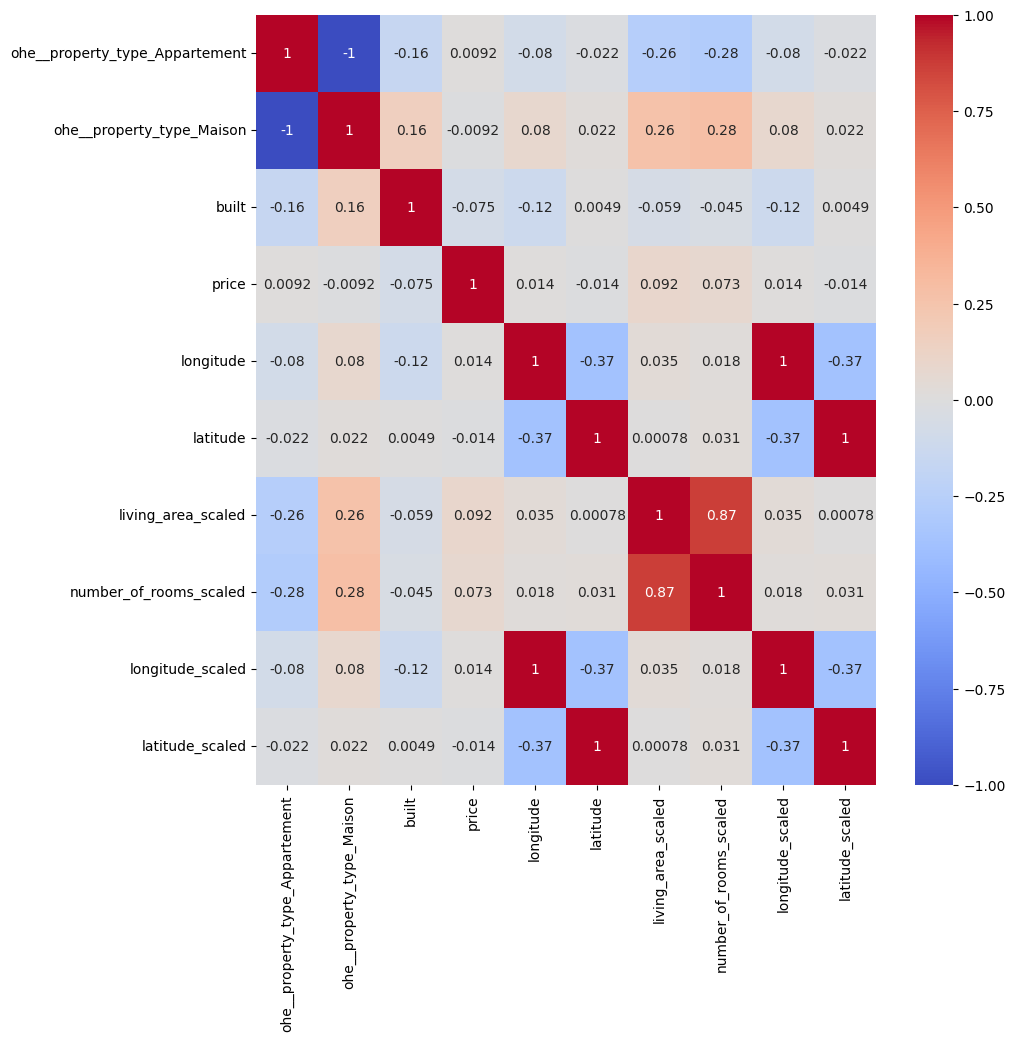

In [78]:
plt.figure(figsize = (10,10))

sns.heatmap(
    data[['ohe__property_type_Appartement',
       'ohe__property_type_Maison', 'built', 'price',
       'longitude', 'latitude', 'living_area_scaled',
       'number_of_rooms_scaled', 'longitude_scaled', 'latitude_scaled']].corr(),
    cmap = 'coolwarm',
    annot = True,
    annot_kws = {"size": 10}
)

## 🐧 Linear Regression

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


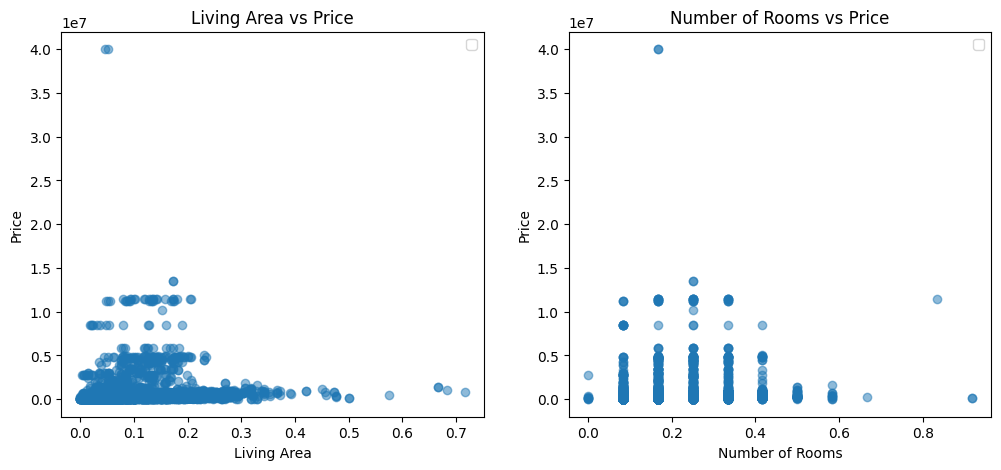

In [79]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

filtered_data = data[data['ohe__property_type_Appartement'] == 1] #Apartment
filtered_data2 = filtered_data[filtered_data['built'] == 1] #Apartments that are built

# Plot Living area vs Sale price
axs[0].scatter(filtered_data2['living_area_scaled'], filtered_data2['price'], alpha = 0.5)
axs[0].set_title('Living Area vs Price')
axs[0].set_ylabel('Price')
axs[0].set_xlabel('Living Area')
axs[0].legend()

# Plot Number of rooms vs Sale price
axs[1].scatter(filtered_data2['number_of_rooms_scaled'], filtered_data2['price'], alpha = 0.5)
axs[1].set_title('Number of Rooms vs Price')
axs[1].set_ylabel('Price')
axs[1].set_xlabel('Number of Rooms')
axs[1].legend()

plt.show()

### Univariate Regression

In [80]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [81]:
import statsmodels.formula.api as smf

model_uni = smf.ols(formula='price ~ living_area_scaled', data=data).fit()
model_uni.rsquared

model_uni.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     263.8
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           4.52e-59
Time:                        15:55:40   Log-Likelihood:            -4.6568e+05
No. Observations:               30624   AIC:                         9.314e+05
Df Residuals:                   30622   BIC:                         9.314e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.859e+05   1.22e+04     15.256      0.000    1.62e+05     2.1e+05
living_area_scaled  1.583e+06   9.75e+04     16.242      0.000    1.39e+06    1.77e+06
==============================================================================
Omnibus:                    54988.093   Durbin-Watson:                   0.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        100490709.000
Skew:                          13.002   Prob(JB):                         0.00
Kurtosis:                     282.425   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multivariate Regression

In [82]:
import statsmodels.formula.api as smf

model_mul = smf.ols(formula='price ~ living_area_scaled + number_of_rooms_scaled', data=data).fit()
model_mul.rsquared

model_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     135.6
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           2.33e-59
Time:                        15:55:40   Log-Likelihood:            -4.6567e+05
No. Observations:               30624   AIC:                         9.313e+05
Df Residuals:                   30621   BIC:                         9.314e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.075e+05   1.46e+04     14.253      0.000    1.79e+05    2.36e+05
living_area_scaled       2.05e+06   1.98e+05     10.358      0.000    1.66e+06    2.44e+06
number_of_rooms_scaled -3.362e+05   1.24e+05     -2.713      0.007   -5.79e+05   -9.33e+04
==============================================================================
Omnibus:                    54996.641   Durbin-Watson:                   0.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        100708359.889
Skew:                          13.005   Prob(JB):                         0.00
Kurtosis:                     282.729   Cond. No.                         42.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Important feature identification

In [83]:
'''model_mul.params.drop('Intercept')

coefficients = model_mul.params
coefficients = coefficients.drop('Intercept')
plt.bar(coefficients.index, coefficients)
plt.title('Important features correlating with review_score, p = 0.04')'''

"model_mul.params.drop('Intercept')\n\ncoefficients = model_mul.params\ncoefficients = coefficients.drop('Intercept')\nplt.bar(coefficients.index, coefficients)\nplt.title('Important features correlating with review_score, p = 0.04')"

#### Model Performance

In [84]:
'''
#Residual computation (should be close to 0)
n = len(X_std)
predicted_values = model_mul.predict()
residuals = X_std['price'] - predicted_values
residuals.std() / X_std.wait_time.std() / (n-2)**0.5

#Root Mean Squared Error
rmse = np.sqrt(np.mean(residuals**2))
rmse

#Plot residuals
sns.histplot(residuals, kde=True, edgecolor='w')
plt.title('Residuals')'''

"\n#Residual computation (should be close to 0)\nn = len(X_std)\npredicted_values = model_mul.predict()\nresiduals = X_std['price'] - predicted_values\nresiduals.std() / X_std.wait_time.std() / (n-2)**0.5\n\n#Root Mean Squared Error\nrmse = np.sqrt(np.mean(residuals**2))\nrmse\n\n#Plot residuals\nsns.histplot(residuals, kde=True, edgecolor='w')\nplt.title('Residuals')"

### Linear Regression with ML

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate, cross_val_score

In [86]:
#Define data - has been done previously
#X = data.drop(columns='price')
#y = data['price']

#Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#LinRegression
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

#Make prediction
y_pred = model_lin.predict(X_test)

#Evaluate model
mse = mean_squared_error(y_test, y_pred)

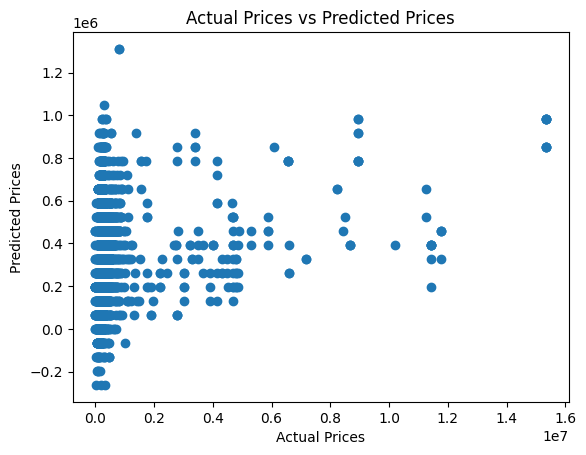

In [87]:
#Visualize predictions
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## 🐓 KNN Regression

In [88]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

# Instanciate the model
knn_model = KNeighborsRegressor()

# Train the model on the scaled Training data
cv_results = cross_validate(knn_model, X_train_preproc,y_train)

base_knn_score = cv_results['test_score'].mean()

base_knn_score

ValueError: Found input variables with inconsistent numbers of samples: [27522, 24499]

## Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Define data - has been done previously
#X = data.drop(columns='price')
#y = data['price']

#Split into training and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor()

model_dtr.fit(X_train, y_train)

y_pred = model_dtr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('Train score:', model_dtr.score(X_test, y_test))
print('Cross validation score mean', cross_val_score(model_dtr, X_train, y_train, cv = 5).mean())

Mean Squared Error: 978304602440.2781
Train score: 0.0832961702606766
Cross validation score mean 0.284725320415942


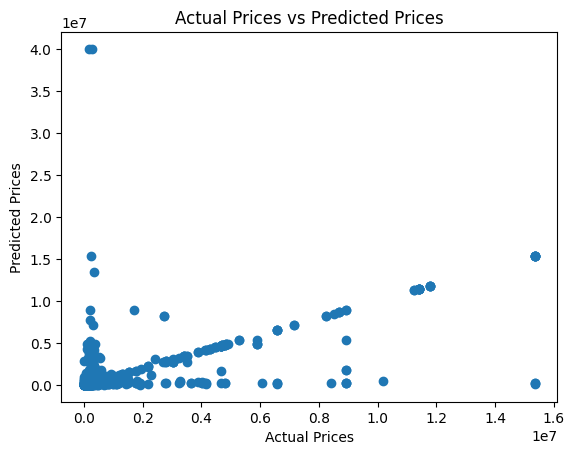

In [ ]:
#Visualize DTR
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## 🐬 Ensemble Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor()

model_rfr.fit(X_train, y_train)
y_pred = model_rfr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(1/2)
print(f'Mean Squared Error: {rmse}')
print( 'Train score:', model_rfr.score(X_test, y_test))
print('Cross val score mean', cross_val_score(model_rfr, X_train, y_train, cv = 5).mean())

Mean Squared Error: 628637.4899437703
Train score: 0.6296984722297971
Cross val score mean 0.5374258959730038


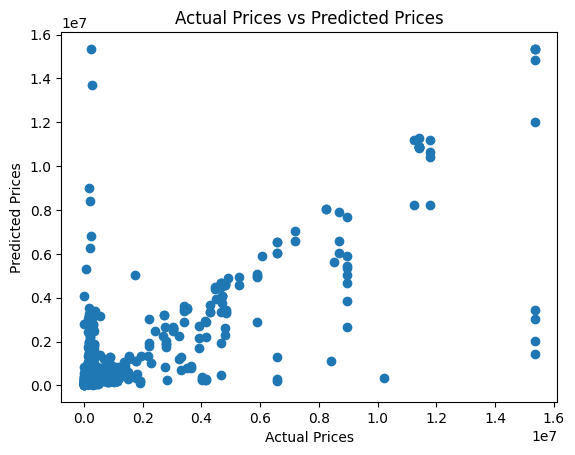

In [ ]:
#Visualize RFR
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()

model_gbr.fit(X_train, y_train)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
y_pred = model_gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print( 'Train score:', model_gbr.score(X_test, y_test))
print('Cross val score mean', cross_val_score(model_gbr, X_train, y_train, cv = 5).mean())

Mean Squared Error: 522534210108.80664
Train score: 0.5103681303535551
Cross val score mean 0.4203673810906617


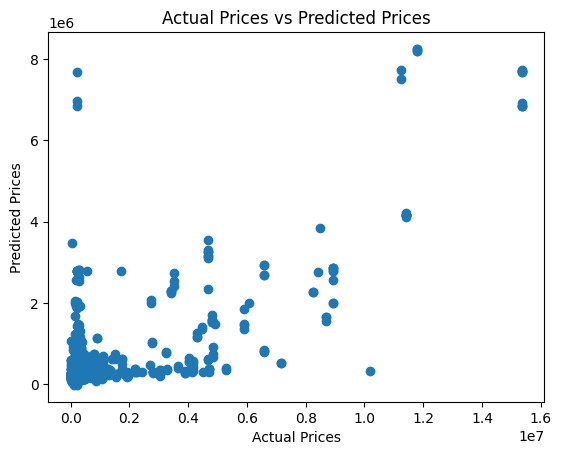

In [ ]:
#Visualize GBR
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def model_xgb(X_train, y_train, X_test, y_test, X_all, y_all):

    model_xgb = XGBRegressor(  )

    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)

    mse = mean_squared_error(y_pred, y_test)
    rmse = mse**(1/2)

    train_score = model_xgb.score(X_train, y_train)
    test_score = model_xgb.score(X_test, y_test)
    cv_mean = cross_val_score(model_xgb, X_all, y_all, cv = 5).mean()

    baseline_train = 'Baseline train score was 0.63'
    baseline_cv_mean = 'Baseline cv score mean was 0.54'

    results = {'RMSE': rmse,
               'Train score': train_score,
               'Test score': test_score,
               'CV mean': cv_mean,
               'Baseline train score': baseline_train,
               'Baseline cv score': baseline_cv_mean}

    return results

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:ohe__property_type_Appartement: object, ohe__property_type_Maison: object, built: object, longitude: object, latitude: object

## 🐇 Optional: Deep Learning